# Fourier spectrum of quantum models: Building a model (100 points)

In this set of problems, we will learn how to calculate the Fourier spectrum of quantum circuits that encode classical data. As a first step, let's learn how to encode classical data using quantum circuits!

Functions taking classical input data can be evaluated by building quantum circuits and computing the expectation value of Hermitian operators. These circuits depend on additional parameters (other than the data), which means that they, in fact, model a family of functions.

In order to encode real-valued data and build a function that models it, we generally build a circuit that has the following structure.

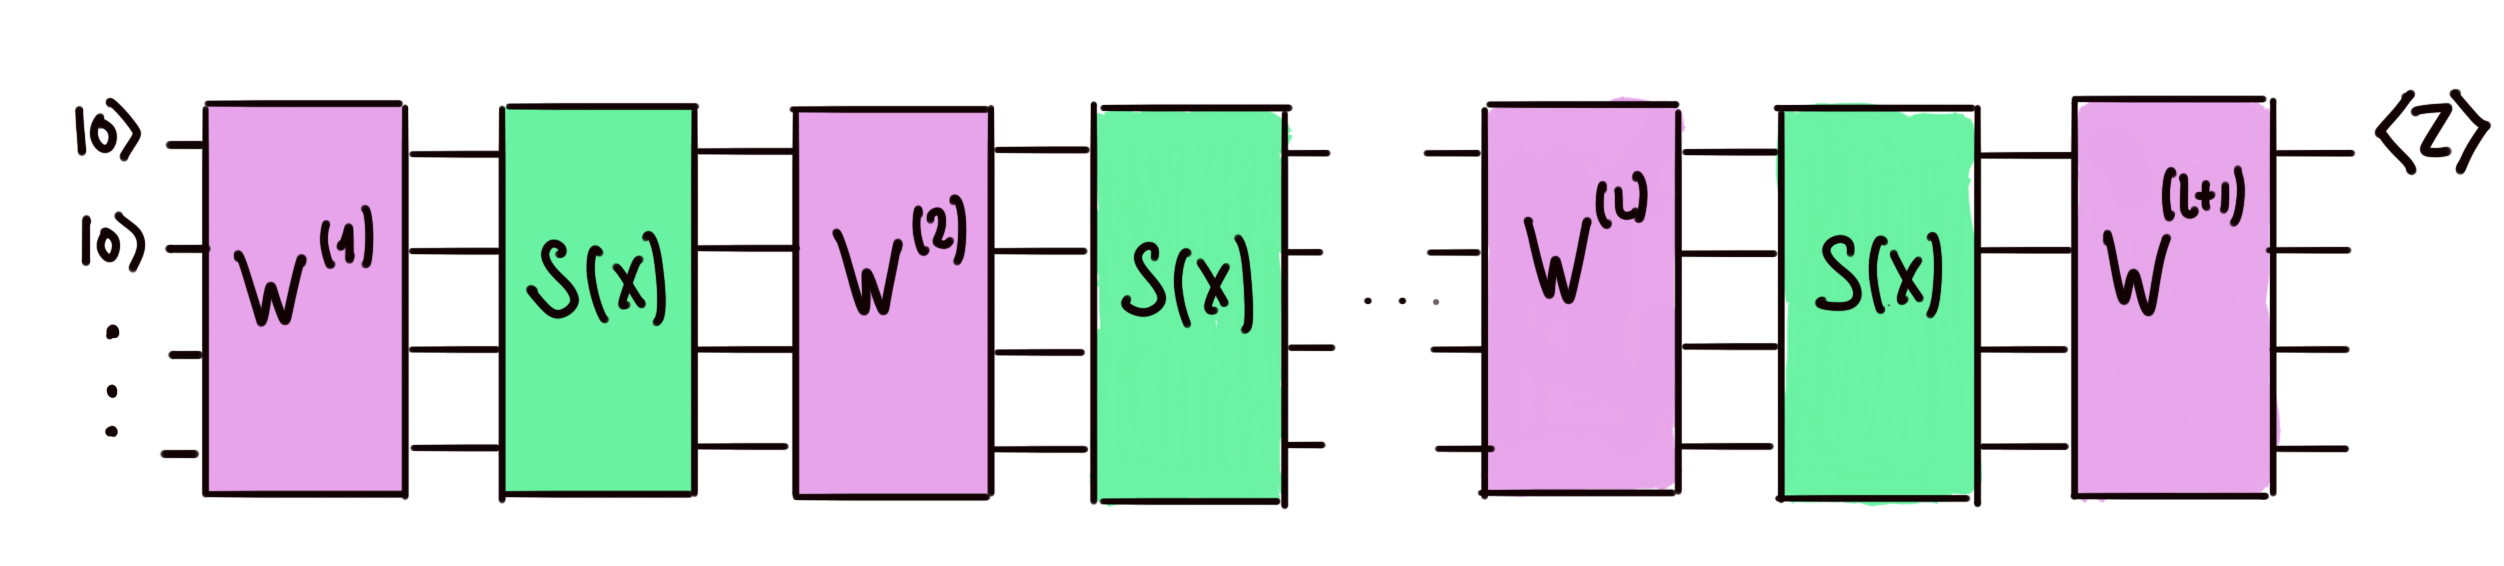

The $W^{(i)}$ unitaries are known as the trainable circuit blocks, which depend on independent parameters $\theta^{(i)}$. The $S(x)$ are known as the encoding circuit blocks, and depend on the classical input data $x$, which is a real number.

In this challenge, we will work with a three-wire quantum circuit. We choose the $W^{(i)}$ to be the following one-parameter unitary.

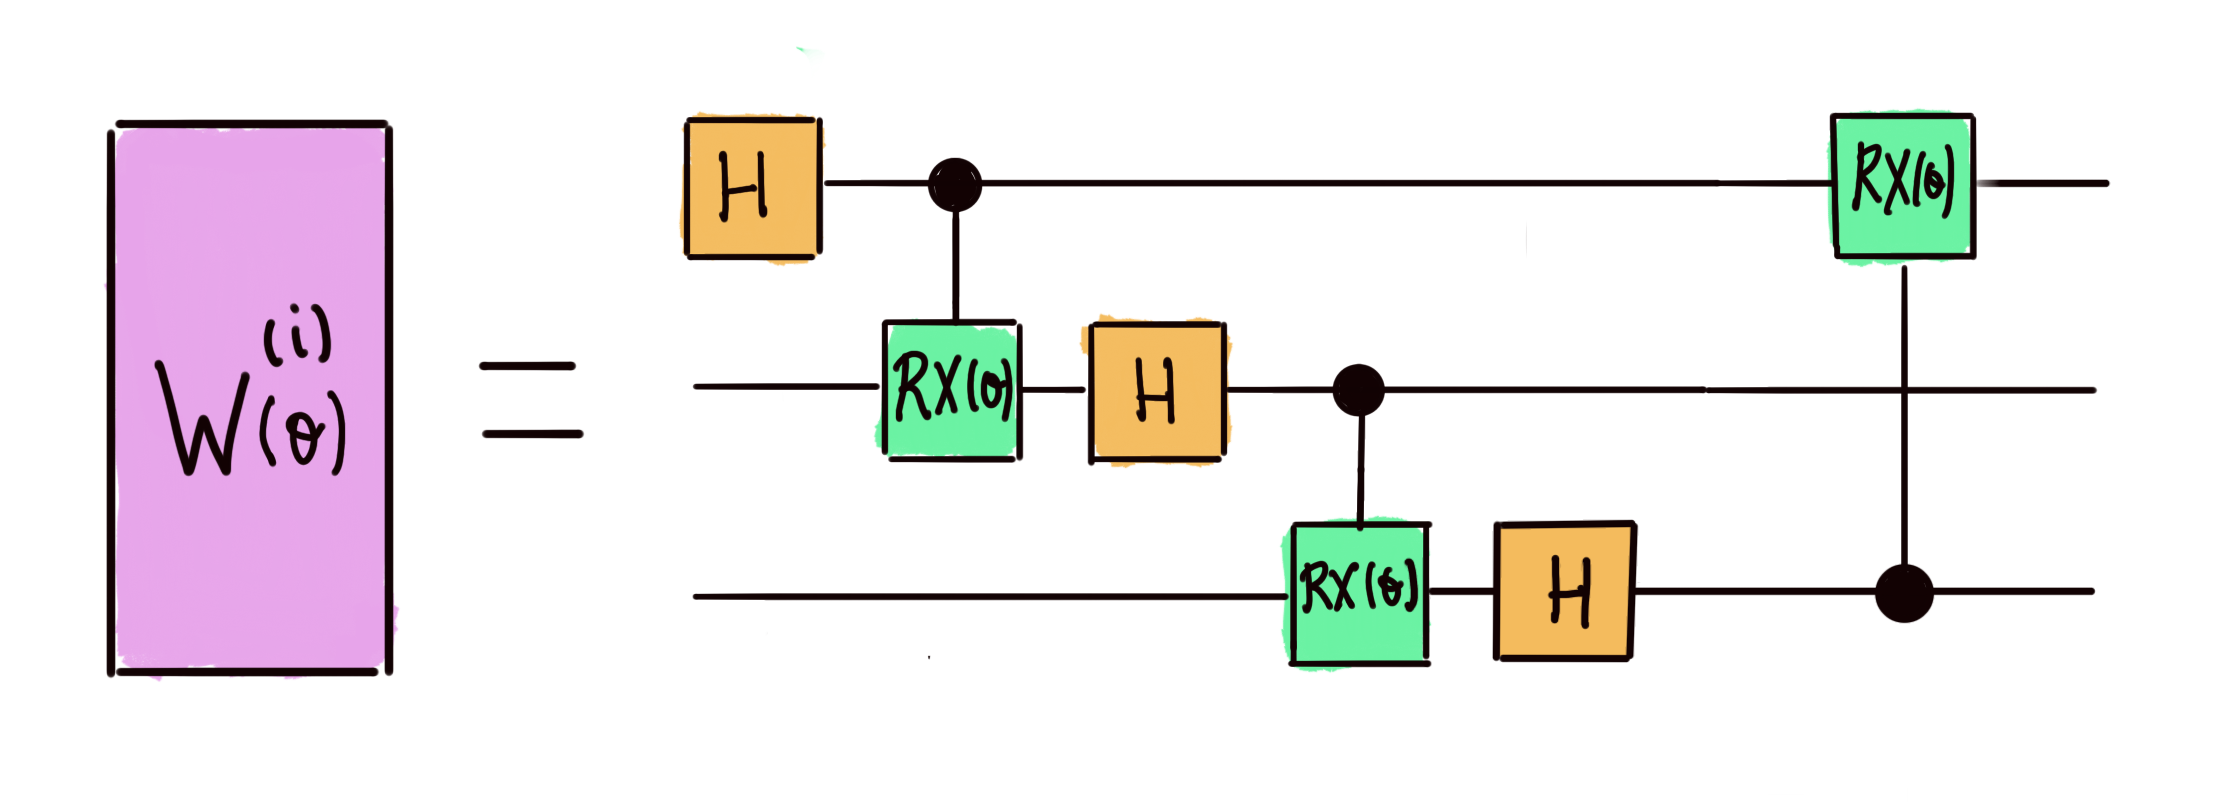

Do keep in mind that each of the trainable blocks $W^{(i)}$ depends on the independent trainable parameters $\theta^{(i)}$ !

We will build two types of model. In the first one, the data is encoded in parallel. In this case, there are only two trainable blocks  $W^{(1)}$ and $W^{(2)}$ and, given a number of encoding gates $n$ , the encoding block $S(x)$ is given by the following set of $n$ in-parallel X-rotations:


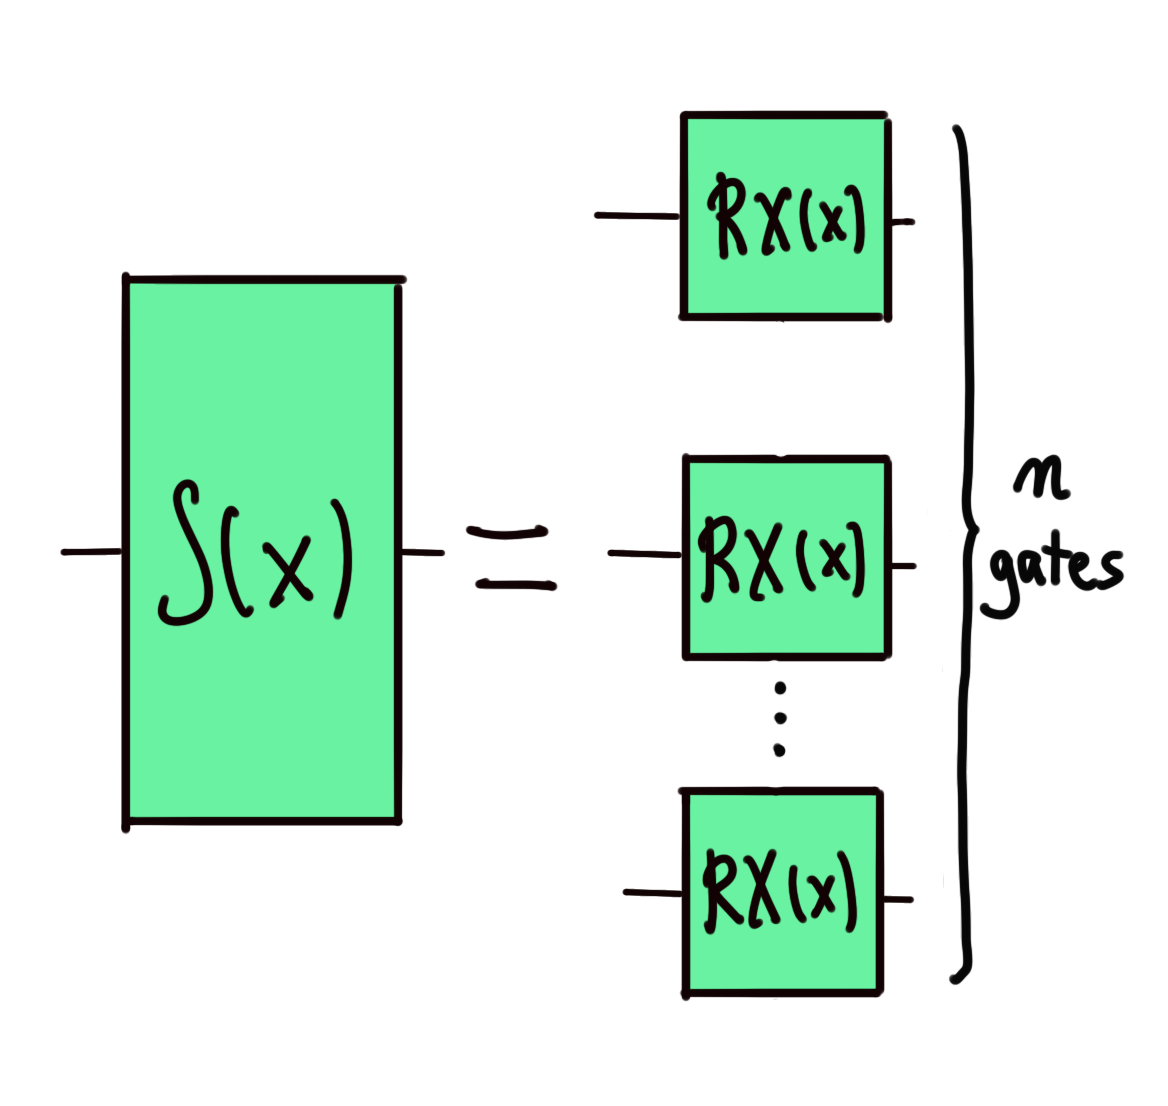

The second type of model encodes the data in series. In this case $S(x)$ is only one X-rotation acting on the first wire. Given the number of encoding gates n, the circuit takes the form:

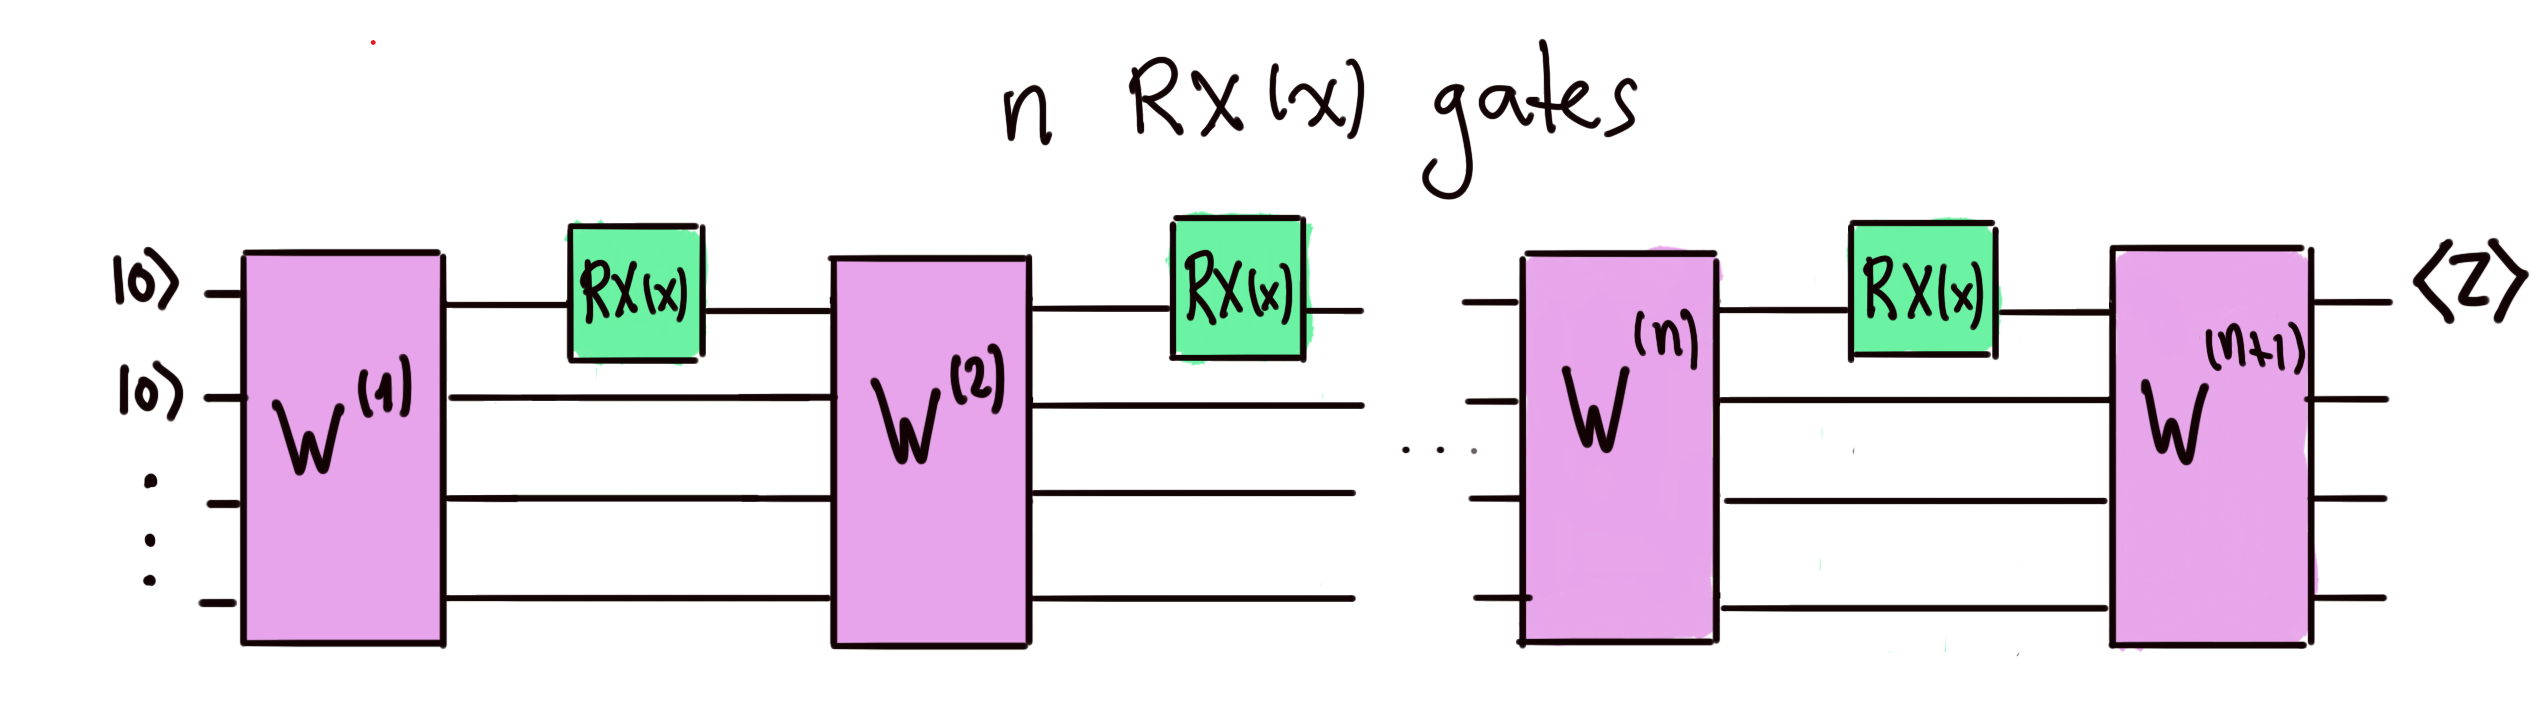



### Challenge code

You must complete the quantum_model function to build the in-series or in-parallel quantum circuit described above, as specified by an input string that takes the values "series" or "parallel". The function must then return the expectation value of the Pauli-Z operator on the first wire.

#### Input
As input to this problem, you are given:

- `n (int)`: The number of enconding gates $(RX(x))$ used in our circuit, as explained above. To account for the parallel case, we assume it's always smaller than or equal to the number of wires.
- `train_params (list(float))`: A list of length `n + 1`. In the in-series case, these are the parameters of the trainable blocks (the angles) from left to right. In the parallel case, since there are only two trainable blocks, only the first two elements of this list are used.
- `x (float)`: The input data, and also the rotation parameter in the encoding blocks.
- `model_type (str)`: A string that can take the value "series" or "parallel", depending on the type of encoding we choose.

#### Output

This code will output a float corresponding to the expectation value of PauliZ measurements on the first wire of our quantum model.

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's an absolute tolerance of 0.01), the output will be `"Correct!"`. Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

In [1]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

In [6]:
def quantum_model(n, train_params, x, model_type):
    """
    Builds an in-series or parallel quantum model according to the specifications in the problem statement, returning
    the expectation value on the first wire.

    Args: 
        n (int): The total number of encoding gates. Assumed to be smaller than,
                or equal to, the number of wires (3).
        train_params (list(float)): A list of length n + 1, which indicates the rotation parameter characterizing
                    the trainable circuit. If the circuit is parallel, only the first two parameters are used.
        x (float): A real number representing the input data point.
        model_type (str): A string that is "series" or "parallel", depending on the type of model.  

    Returns: 
        (float): The expectation value of PauliZ measurements on the first wire.
    """ 
 
                                 
    num_wires=3


    dev = qml.device('default.qubit', wires = num_wires)

    # Write any helper functions, such as subcircuits you may use later, here.

                                           
    @qml.qnode(dev)
    def circuit(n, train_params, x, model_type):
        if model_type == "parallel":
            for i in range(num_wires):
                qml.Hadamard(i)
                qml.CRX(train_params[0],wires=[i,(i+1)%num_wires])
            for ii in range(n):
                qml.RX(x,wires=ii)
            for i in range(num_wires):
                qml.Hadamard(i)
                qml.CRX(train_params[1],wires=[i,(i+1)%num_wires])    
        elif model_type == "series":
            # Put your code here #
            for j in range(n):
                for i in range(num_wires):
                    qml.Hadamard(i)
                    qml.CRX(train_params[j],wires=[i,(i+1)%num_wires])
                qml.RX(x,wires=0)
            for i in range(num_wires):
                qml.Hadamard(i)
                qml.CRX(train_params[-1],wires=[i,(i+1)%num_wires])
        
        # Return an expectation value
        return qml.expval(qml.PauliZ(0))
    # Finally, return a float, not a numpy tensor. You can do this using the .numpy() method!
    return circuit(n, train_params, x, model_type).numpy()


In [7]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = quantum_model(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises: 
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your circuit doesn't look quite right."

In [8]:
test_cases = [['[2,[0.4,0.8,1.0],1.2,"parallel"]', '0.977856732420062'], ['[3,[0.6,0.7,0.8,1.2],1.3,"series"]', '0.37048658401504975']]

In [9]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[2,[0.4,0.8,1.0],1.2,"parallel"]'...
Correct!
Running test case 1 with input '[3,[0.6,0.7,0.8,1.2],1.3,"series"]'...
Correct!
